# Paso 1:
Abrir nuestro csv con la información moldeada y convertir el formato de la columna date a datetime

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
btc_df = pd.read_csv('../csv_files/btc_mxn_bitso_19_12_14.csv')

In [3]:
btc_df.date = btc_df.date.astype('datetime64')

In [45]:
df_dum = pd.get_dummies(btc_df)

In [46]:
df_dum.rename(columns={'m_side_buy':'buy', 'm_side_sell':'sell'}, inplace=True)

In [56]:
df_dum

,date,24h_avg,12h_avg,min,max,volume,buy,sell
0,2019-01-01,72367.013703,71940.650982,71482.60,74305.00,23.596065,0,1
1,2019-01-02,74240.741398,73729.642422,73200.00,75800.00,32.171027,0,1
2,2019-01-03,74502.944671,75087.876912,73206.01,75770.91,32.681422,0,1
3,2019-01-04,73862.854180,74143.966128,73111.00,74992.99,63.488756,1,0
4,2019-01-05,74501.196250,74502.782839,73500.00,75340.12,43.711783,1,0
...,...,...,...,...,...,...,...,...
343,2019-12-10,140312.664853,141920.500901,138009.72,142536.45,42.952229,0,1
344,2019-12-11,137608.144227,139283.050570,132000.00,139900.00,35.334826,1,0
345,2019-12-12,136844.432405,136662.505259,135250.41,138699.98,25.641359,0,1
346,2019-12-13,137767.075557,137186.985455,136800.01,138799.97,39.382959,0,1


In [59]:
change = []
for i in range(1,len(df_dum)):
    if df_dum.sell.iloc[i] != df_dum.sell.iloc[i-1]:
        change.append(df_dum.date.iloc[i])

148

# Paso 2:

Utilizando prophet de Fb con cada una de las columnas de precios

## Utilizando 24h_avg

In [60]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_24h_avg = btc_df[['date', '24h_avg']].copy()

In [61]:
#Cambiando el nombre de las columnas al formato requerido por prophet
btc_24h_avg.rename(columns={'date': 'ds', '24h_avg': 'y'}, inplace=True)

In [62]:
#Entrenando el modelo
mod = Prophet(growth='linear', changepoints=change)
mod.fit(btc_24h_avg)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future = mod.make_future_dataframe(periods=250)
future.head()

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


In [72]:
forecast = mod.predict(future)

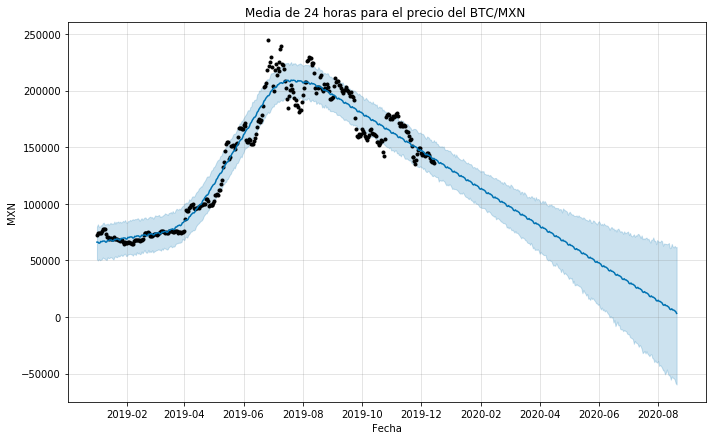

In [73]:
mod.plot(forecast, uncertainty=True)
plt.title('Media de 24 horas para el precio del BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')

plt.show()

In [74]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][350:]

,ds,yhat,yhat_lower,yhat_upper
350,2019-12-17,138461.105953,123540.977574,153026.208446
351,2019-12-18,137833.233084,123602.473826,152864.370445
352,2019-12-19,136186.720079,119610.264738,151079.743063
353,2019-12-20,135702.882166,121075.044734,150744.285607
354,2019-12-21,136415.570329,120642.467584,150505.596016
...,...,...,...,...
593,2020-08-16,6179.311210,-53696.940862,62124.643515
594,2020-08-17,6135.643310,-54103.531045,61387.653317
595,2020-08-18,5431.312945,-55235.366818,62865.164334
596,2020-08-19,4803.440076,-58536.569552,61499.571009


## Utilizando 12h_avg

In [12]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_12h_avg = btc_df[['date', '12h_avg']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_12h_avg.rename(columns={'date': 'ds', '12h_avg': 'y'}, inplace=True)

#Entrenando el modelo
mod12 = Prophet(growth='linear', n_changepoints=150)
mod12.fit(btc_12h_avg)

#Creando el nuevo dataframe con las fechas a predecir
future12 = mod12.make_future_dataframe(periods=60)
future12.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


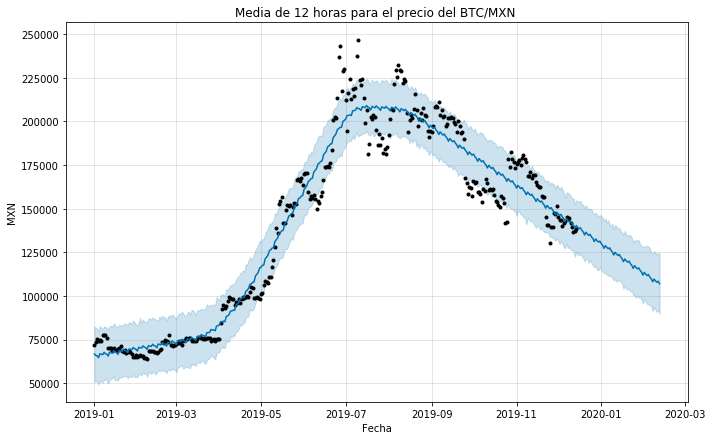

In [13]:
#Prediciendo los precios del nuevo dataframe
forecast12 = mod12.predict(future12)

#Creando gráfico de la predicción
mod12.plot(forecast12, uncertainty=True)
plt.title('Media de 12 horas para el precio del BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [14]:
#Revisando las ultimas columnas del modelo
forecast12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,109678.748601,93603.735815,125709.656865
404,2020-02-09,108704.595678,92152.055809,124856.518873
405,2020-02-10,107853.066525,90853.103139,123696.062244
406,2020-02-11,108434.254363,91889.377963,124784.924799
407,2020-02-12,106978.193259,89728.459154,124280.249896


In [23]:
forecast12.loc[forecast12['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,138116.285937,124333.68397,154555.226094,138058.020147,138171.323259,1006.178292,1006.178292,1006.178292,1006.178292,1006.178292,1006.178292,0.0,0.0,0.0,139122.464229


## Utilizando el mínimo

In [15]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_min = btc_df[['date', 'min']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_min.rename(columns={'date': 'ds', 'min': 'y'}, inplace=True)

#Entrenando el modelo
mod_min = Prophet(growth='linear', n_changepoints=150)
mod_min.fit(btc_min)

#Creando el nuevo dataframe con las fechas a predecir
future_min = mod_min.make_future_dataframe(periods=60)
future_min.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


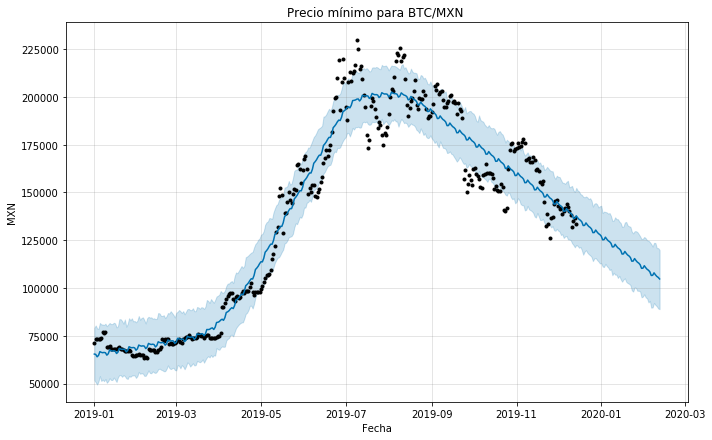

In [16]:
#Prediciendo los precios del nuevo dataframe
forecast_min = mod_min.predict(future_min)

#Creando gráfico de la predicción
mod_min.plot(forecast_min, uncertainty=True)
plt.title('Precio mínimo para BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [17]:
#Revisando las ultimas columnas del modelo
forecast_min[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,107956.721156,92226.459733,123648.597085
404,2020-02-09,106931.236494,91151.166810,123592.548272
405,2020-02-10,106083.710162,90444.882894,120892.920688
406,2020-02-11,105579.694212,89297.803887,120901.338189
407,2020-02-12,104750.589280,88935.013010,119951.678532


In [24]:
forecast_min.loc[forecast_min['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,135160.086311,121489.529944,149190.874204,135106.826566,135213.152862,287.278036,287.278036,287.278036,287.278036,287.278036,287.278036,0.0,0.0,0.0,135447.364347


## Utilizando el máximo


In [18]:
#Seleccionando las columnas necesarias para utilizar con prophet
btc_max = btc_df[['date', 'max']].copy()

#Cambiando el nombre de las columnas al formato requerido por prophet
btc_max.rename(columns={'date': 'ds', 'max': 'y'}, inplace=True)

#Entrenando el modelo
mod_max = Prophet(growth='linear', n_changepoints=150)
mod_max.fit(btc_max)

#Creando el nuevo dataframe con las fechas a predecir
future_max = mod_max.make_future_dataframe(periods=60)
future_max.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
403,2020-02-08
404,2020-02-09
405,2020-02-10
406,2020-02-11
407,2020-02-12


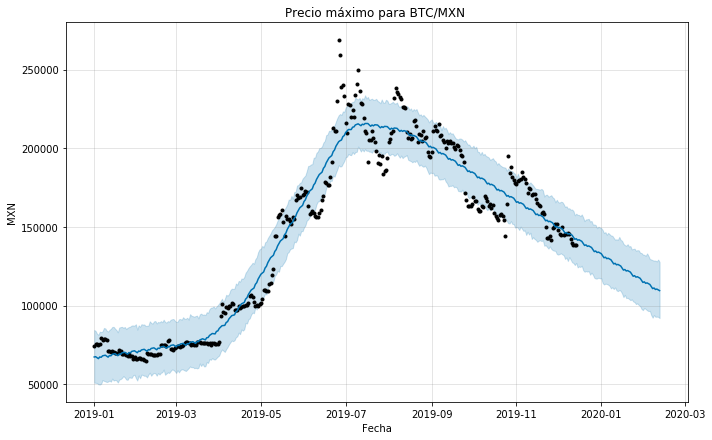

In [19]:
#Prediciendo los precios del nuevo dataframe
forecast_max = mod_max.predict(future_min)

#Creando gráfico de la predicción
mod_max.plot(forecast_max, uncertainty=True)
plt.title('Precio máximo para BTC/MXN ')
plt.xlabel('Fecha')
plt.ylabel('MXN')
plt.show()

In [20]:
#Revisando las ultimas columnas del modelo
forecast_max[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2020-02-08,111174.010089,93982.750569,128597.787312
404,2020-02-09,110247.033194,92865.381634,128606.875355
405,2020-02-10,110505.175223,92971.452658,128061.979244
406,2020-02-11,110014.156850,92839.722896,129266.000680
407,2020-02-12,109511.411119,92027.986626,127724.422895


In [25]:
forecast_max.loc[forecast_max['ds']== dt.date.today()]

/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
350,2019-12-17,140835.15376,124554.31443,156839.650731,140767.933756,140889.470946,503.416456,503.416456,503.416456,503.416456,503.416456,503.416456,0.0,0.0,0.0,141338.570216
